# Cyberwareness Analytics

* Note: Python needs a MySQL driver to access the MySQL database. (see: https://www.w3schools.com/python/python_mysql_getstarted.asp )
* ER model of the database:  
  <img src='ER_model_cyberwareness.png' width="60%" align="left" style="border: 1px solid lightgrey"/>

## Import of required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import mysql
import mysql.connector
import config as cfg

## Global variables/settings

In [2]:
#set the plot size for all Matplotlib plots in this notebook
plt.rcParams['figure.figsize'] = [10, 7]

#colors
c = ['#FF6384', '#36A2EB','#FFCE56','#4BC0C0','#9966FF','#FF9F40']

sexes=["Female", "Male", "Other"]

## Connect with database

In [3]:
connection = mysql.connector.connect(host=cfg.db_connect['host'], 
                                     user=cfg.db_connect['user'], 
                                     passwd = cfg.db_connect['passwd'], 
                                     db=cfg.db_connect['db'])

## Cursor object

In [4]:
cursor = connection.cursor()

## Data presentation

### Visitors categorized by sex

In [5]:
query = ''' 
SELECT COUNT(visitor_ID) AS number_of_visitors , sex 
FROM Visitor
GROUP BY sex'''

df = pd.read_sql(query, connection)
df

,number_of_visitors,sex
0,4,Female
1,6,Male
2,2,Other


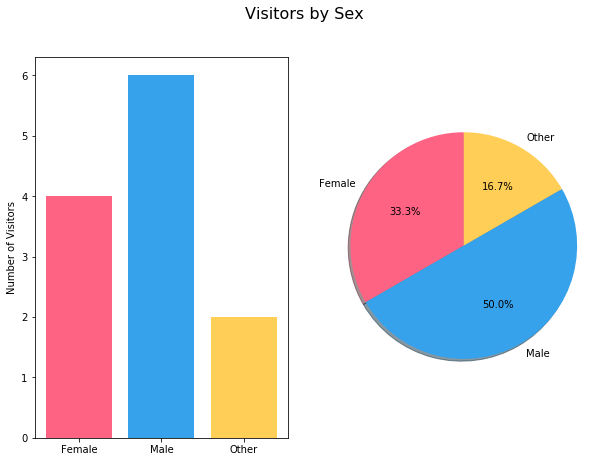

In [6]:
fig, axs = plt.subplots(ncols=2, nrows=1)

cursor.execute(''' 
SELECT COUNT(visitor_ID), sex 
FROM Visitor
GROUP BY sex''')

result = cursor.fetchall

number = []
sex = []
  
for i in cursor:
    number.append(i[0])
    sex.append(i[1])

# bar plot
axs[0].bar(sex, number, color=c)
axs[0].set_ylabel('Number of Visitors')
axs[0].set_yticks(range(0,max(number)+1,1)) #range(start, stop, step): step can be adjusted if the numbers increase

#pie chart
axs[1].pie(number, labels=sex, colors=c, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.suptitle("Visitors by Sex", fontsize=16)
plt.show()

### Visitors categorized by region

In [7]:
query = ''' 
SELECT COUNT(visitor_ID) AS number_of_visitors , region 
FROM Visitor
GROUP BY region'''

df = pd.read_sql(query, connection)
df

,number_of_visitors,region
0,1,Africa
1,1,Asia
2,5,Europe
3,3,North America
4,1,Oceania
5,1,South America


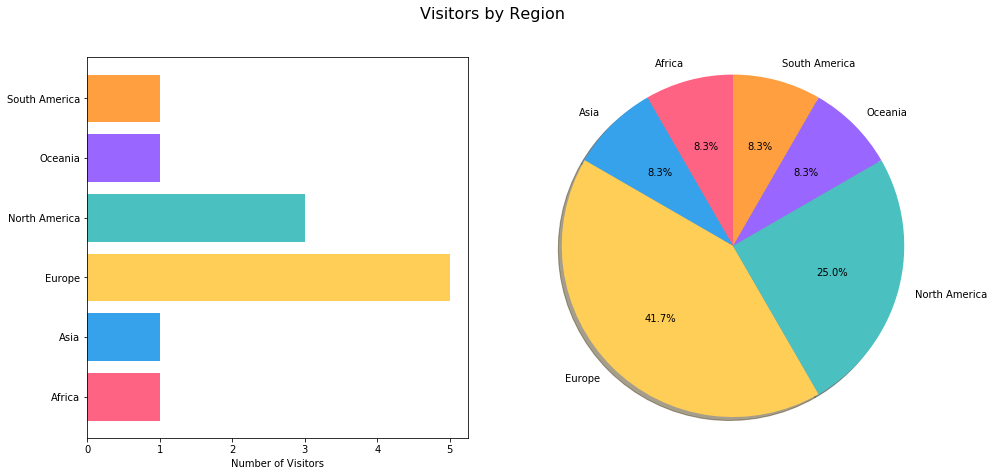

In [22]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=[15,7])

cursor.execute(''' 
SELECT COUNT(visitor_ID), region 
FROM Visitor
GROUP BY region''')

result = cursor.fetchall

number = []
region = []
  
for i in cursor:
    number.append(i[0])
    region.append(i[1])

# bar plot
axs[0].barh(region, number, color=c)
axs[0].set_xlabel('Number of Visitors')
axs[0].set_yticks(range(0,max(number)+1,1)) #range(start, stop, step): step can be adjusted if the numbers increase

#pie chart
axs[1].pie(number, labels=region, colors=c, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.suptitle("Visitors by Region", fontsize=16)
plt.show()

### Visitors categorized by region and sex

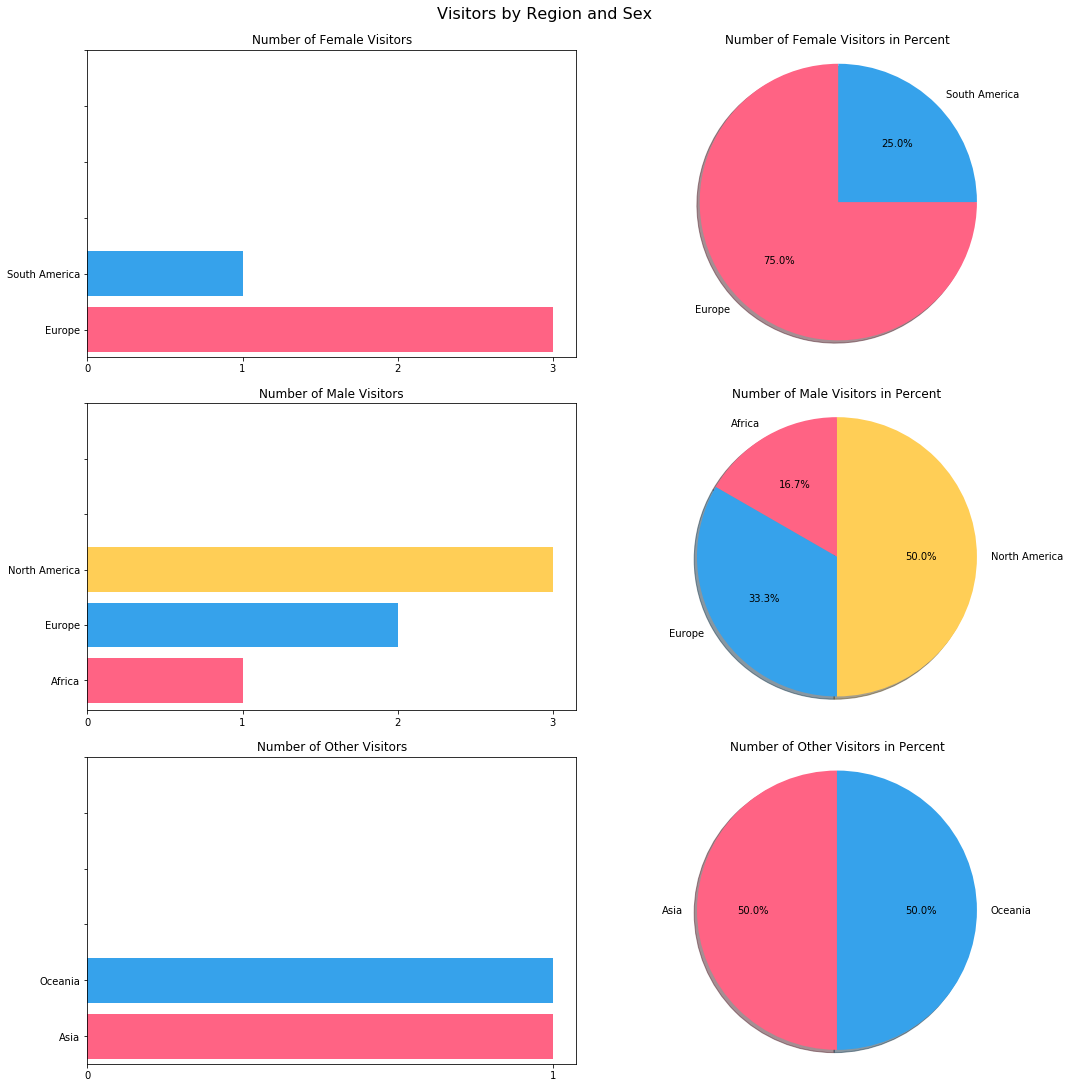

In [9]:
fig = plt.figure(constrained_layout=True, figsize=[15,15])


gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[-1, 0])
ax6 = fig.add_subplot(gs[-1, -1])

axs =[ax1, ax2, ax3, ax4, ax5, ax6]

region_female, region_male, region_other = [], [], []
number_female, number_male, number_other = [], [], []
regions =[region_female, region_male, region_other]
numbers =[number_female, number_male, number_other]

for (ax, sex, region, number) in zip(axs, sexes, regions, numbers):
    
    cursor.execute(''' 
    SELECT COUNT(visitor_ID), region 
    FROM Visitor
    WHERE sex = %s
    GROUP BY region''', (sex,))

    result = cursor.fetchall
  
    for i in cursor:
        number.append(i[0])
        region.append(i[1])

for (i,number,region,sex) in zip(range(0,len(axs),2), numbers, regions, sexes):
    #bar chart
    axs[i].barh(region, number, color=c)
    if number:
        axs[i].set_xticks(range(0,max(number)+1,1)) 
    axs[i].set_yticks(range(0,6,1))
    axs[i].set_title("Number of "+sex+" Visitors")
    
    #pie chart
    axs[i+1].pie(number, labels=region, colors=c, autopct='%1.1f%%',
        shadow=True, startangle=90)
    axs[i+1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axs[i+1].set_title("Number of "+sex+" Visitors in Percent")


fig.suptitle("Visitors by Region and Sex", fontsize=16)
plt.show()

### Visitors categorized by age

In [10]:
query = ''' 
SELECT AVG(age) AS average_age, MIN(age) AS minimum_age, MAX(age) AS maximum_age
FROM Visitor'''

df = pd.read_sql(query, connection)
df

,average_age,minimum_age,maximum_age
0,25.5833,16,45


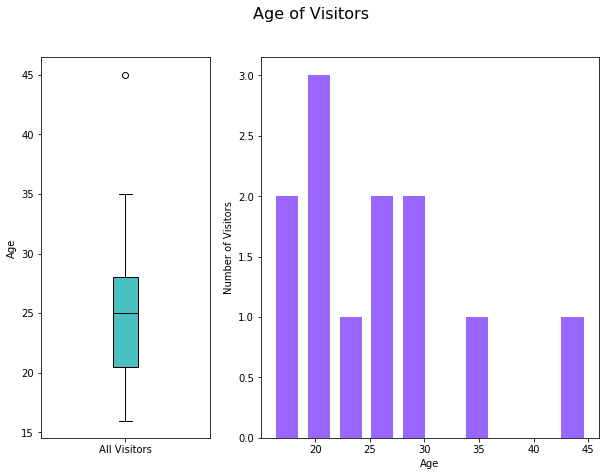

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw={'width_ratios': [1, 2]})

cursor.execute('''
SELECT age 
FROM Visitor
ORDER BY age''')

result = cursor.fetchall

age = []

for i in cursor:
    age.append(i[0])

#boxplot
bp = axs[0].boxplot(age, vert=True, patch_artist=True, labels=['All Visitors'])
for patch, color in zip(bp['boxes'], c[3:4]):
    patch.set_facecolor(color)
for median in bp['medians']: 
    median.set(color ='black') 
axs[0].set_ylabel('Age')
    
#histogram
axs[1].hist(age, color=c[4], rwidth=0.7)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Number of Visitors')

fig.suptitle("Age of Visitors", fontsize=16)
plt.show()

### Visitors categorized by age and region as well as age and sex

In [12]:
query = ''' 
SELECT region, AVG(age) AS average_age, MIN(age) AS minimum_age, MAX(age) AS maximum_age
FROM Visitor
GROUP BY region'''

df = pd.read_sql(query, connection)
df

,region,average_age,minimum_age,maximum_age
0,Africa,17.0000,17,17
1,Asia,35.0000,35,35
2,Europe,27.6000,16,45
3,North America,23.6667,21,27
4,Oceania,27.0000,27,27
5,South America,19.0000,19,19


In [13]:
query = ''' 
SELECT sex, AVG(age) AS average_age, MIN(age) AS minimum_age, MAX(age) AS maximum_age
FROM Visitor
GROUP BY sex'''

df = pd.read_sql(query, connection)
df

,sex,average_age,minimum_age,maximum_age
0,Female,22.7500,16,28
1,Male,25.6667,17,45
2,Other,31.0000,27,35


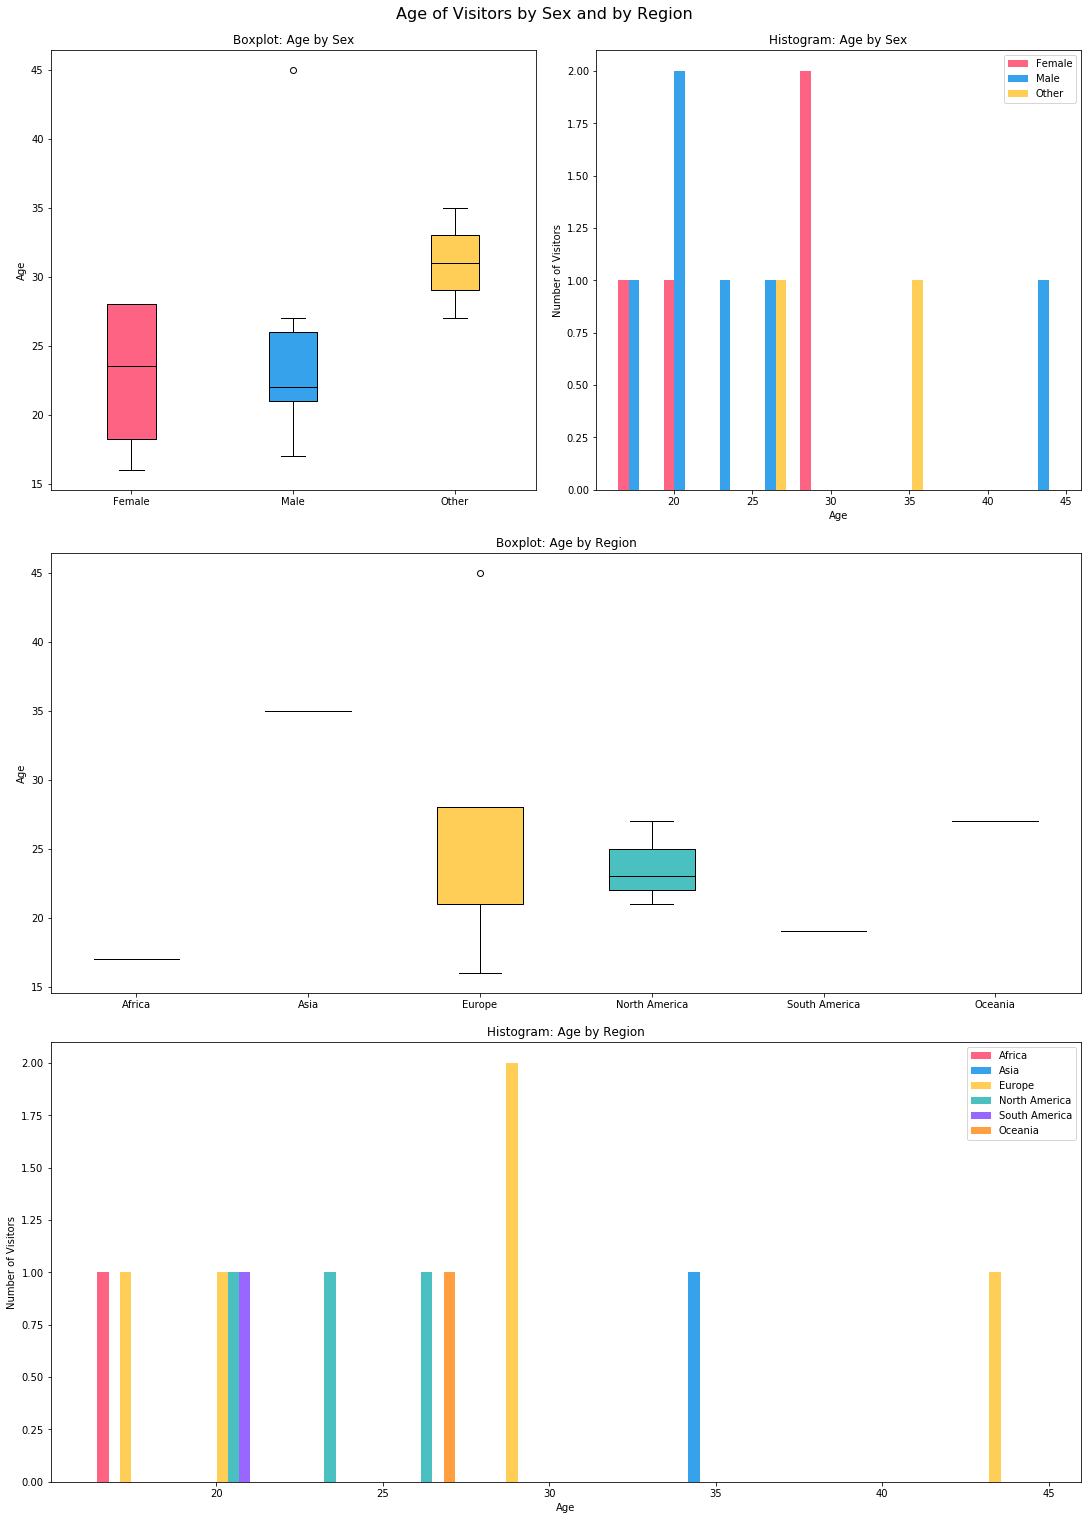

In [14]:
fig = plt.figure(constrained_layout=True, figsize=[15,21])


gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2, :])

#------------------------ Age by Sex --------------------------

age_female, age_male, age_other = [],[],[]

ages =[age_female, age_male, age_other]

for (sex, age) in zip(sexes, ages):
    cursor.execute('''SELECT age FROM Visitor WHERE sex = %s ORDER BY age''', (sex,))

    result = cursor.fetchall

    for i in cursor:
        age.append(i[0])

#boxplot 1
bp = ax1.boxplot(ages, vert=True, patch_artist=True, labels=sexes)
for patch, color in zip(bp['boxes'], c):
    patch.set_facecolor(color)
for median in bp['medians']: 
    median.set(color ='black') 

#histogram 1
ax2.hist(ages, color=c[0:3] , rwidth=0.7, label=sexes)
ax2.legend(prop={'size': 10})

ax1.set_title("Boxplot: Age by Sex")
ax2.set_title("Histogram: Age by Sex")
ax1.set_ylabel('Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of Visitors')


#------------------------ Age by Region --------------------------

age_africa, age_asia, age_europe, age_northAmerica, age_southAmerica, age_oceania = [],[],[],[],[],[]
regions = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
ages=[age_africa, age_asia, age_europe, age_northAmerica, age_southAmerica, age_oceania]

for (region, age) in zip(regions, ages):
    cursor.execute('''SELECT age FROM Visitor WHERE region = %s ORDER BY age''', (region,))

    result = cursor.fetchall

    for i in cursor:
        age.append(i[0])

#boxplot 2
bp2 = ax3.boxplot(ages, vert=True, patch_artist=True, labels=regions)
for patch, color in zip(bp2['boxes'], c):
    patch.set_facecolor(color)
for median in bp2['medians']: 
    median.set(color ='black') 

#histogram 2
ax4.hist(ages,color=c, rwidth=0.7, label=regions)
ax4.legend(prop={'size': 10})
    
ax3.set_title("Boxplot: Age by Region")
ax4.set_title("Histogram: Age by Region")
ax3.set_ylabel('Age')
ax4.set_xlabel('Age')
ax4.set_ylabel('Number of Visitors')
    
fig.suptitle('Age of Visitors by Sex and by Region', fontsize=16)
plt.show()

## Scores

In [15]:
labels = ['Score\nGeneral', 'Score\nPhishing', 'Score\nOnline\nEnvironment', 'Score\nPhysical\nAttacks']

In [16]:
query1 = '''
SELECT AVG(general) AS avg_score_general, AVG(phishing) AS avg_score_phishing, AVG(online_environment) AS avg_score_online_environment, AVG(physical_attacks) AS avg_score_physical_attacks
FROM Score'''

query2 = '''
SELECT MIN(general) AS min_score_general, MIN(phishing) AS min_score_phishing, MIN(online_environment) AS min_score_online_environment, MIN(physical_attacks) AS min_score_physical_attacks
FROM Score'''

query3 = '''
SELECT MAX(general) AS max_score_general, MAX(phishing) AS max_score_phishing, MAX(online_environment) AS max_score_online_environment, MAX(physical_attacks) AS max_score_physical_attacks
FROM Score'''

queries = [query1, query2, query3]

for query in queries:
    df = pd.read_sql(query, connection)
    display(df)

,avg_score_general,avg_score_phishing,avg_score_online_environment,avg_score_physical_attacks
0,72.5,75.2,79.2,86.9


,min_score_general,min_score_phishing,min_score_online_environment,min_score_physical_attacks
0,15,25,50,50


,max_score_general,max_score_phishing,max_score_online_environment,max_score_physical_attacks
0,100,100,100,100


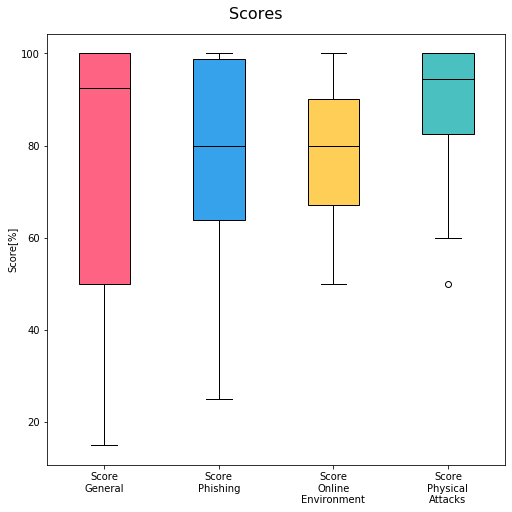

In [17]:
fig, ax = plt.subplots(constrained_layout=True, figsize=[7,7])

cursor.execute('''SELECT general, phishing, online_environment, physical_attacks FROM Score''')

result = cursor.fetchall

general = []
phishing = []
online_environment = []
physical_attacks = []

for i in cursor:
    general.append(i[0])
    phishing.append(i[1])
    online_environment.append(i[2])
    physical_attacks.append(i[3])

score = [general, phishing, online_environment, physical_attacks]

#boxplot
bp = plt.boxplot(score, vert=True, patch_artist=True, labels=labels)
for patch, color in zip(bp['boxes'], c):
    patch.set_facecolor(color)
for median in bp['medians']: 
    median.set(color ='black') 
ax.set_ylabel('Score[%]')

fig.suptitle('Scores', fontsize=16)
plt.show()

#### Scores categorized by sex

In [18]:
query1 = '''
SELECT Visitor.sex, AVG(Score.general) AS avg_score_general, AVG(Score.phishing) AS avg_score_phishing, AVG(Score.online_environment) AS avg_score_online_environment, AVG(Score.physical_attacks) AS avg_score_physical_attacks
FROM Score
INNER JOIN Visitor ON Score.visitor_ID = Visitor.visitor_ID
GROUP BY sex'''

query2 = '''
SELECT Visitor.sex, MIN(Score.general) AS min_score_general, MIN(Score.phishing) AS min_score_phishing, MIN(Score.online_environment) AS min_score_online_environment, MIN(Score.physical_attacks) AS min_score_physical_attacks
FROM Score
INNER JOIN Visitor ON Score.visitor_ID = Visitor.visitor_ID
GROUP BY sex'''

query3 = '''
SELECT Visitor.sex, MAX(Score.general) AS max_score_general, MAX(Score.phishing) AS max_score_phishing, MAX(Score.online_environment) AS max_score_online_environment, MAX(Score.physical_attacks) AS max_score_physical_attacks
FROM Score
INNER JOIN Visitor ON Score.visitor_ID = Visitor.visitor_ID
GROUP BY sex'''

queries = [query1, query2, query3]

for query in queries:
    df = pd.read_sql(query, connection)
    display(df)

,sex,avg_score_general,avg_score_phishing,avg_score_online_environment,avg_score_physical_attacks
0,Female,95.0000,79.0000,78.6667,80.0000
1,Male,56.6667,69.1667,76.0000,88.1667
2,Other,100.0000,100.0000,100.0000,100.0000


,sex,min_score_general,min_score_phishing,min_score_online_environment,min_score_physical_attacks
0,Female,85,37,66,50
1,Male,15,25,50,60
2,Other,100,100,100,100


,sex,max_score_general,max_score_phishing,max_score_online_environment,max_score_physical_attacks
0,Female,100,100,100,100
1,Male,100,95,90,100
2,Other,100,100,100,100


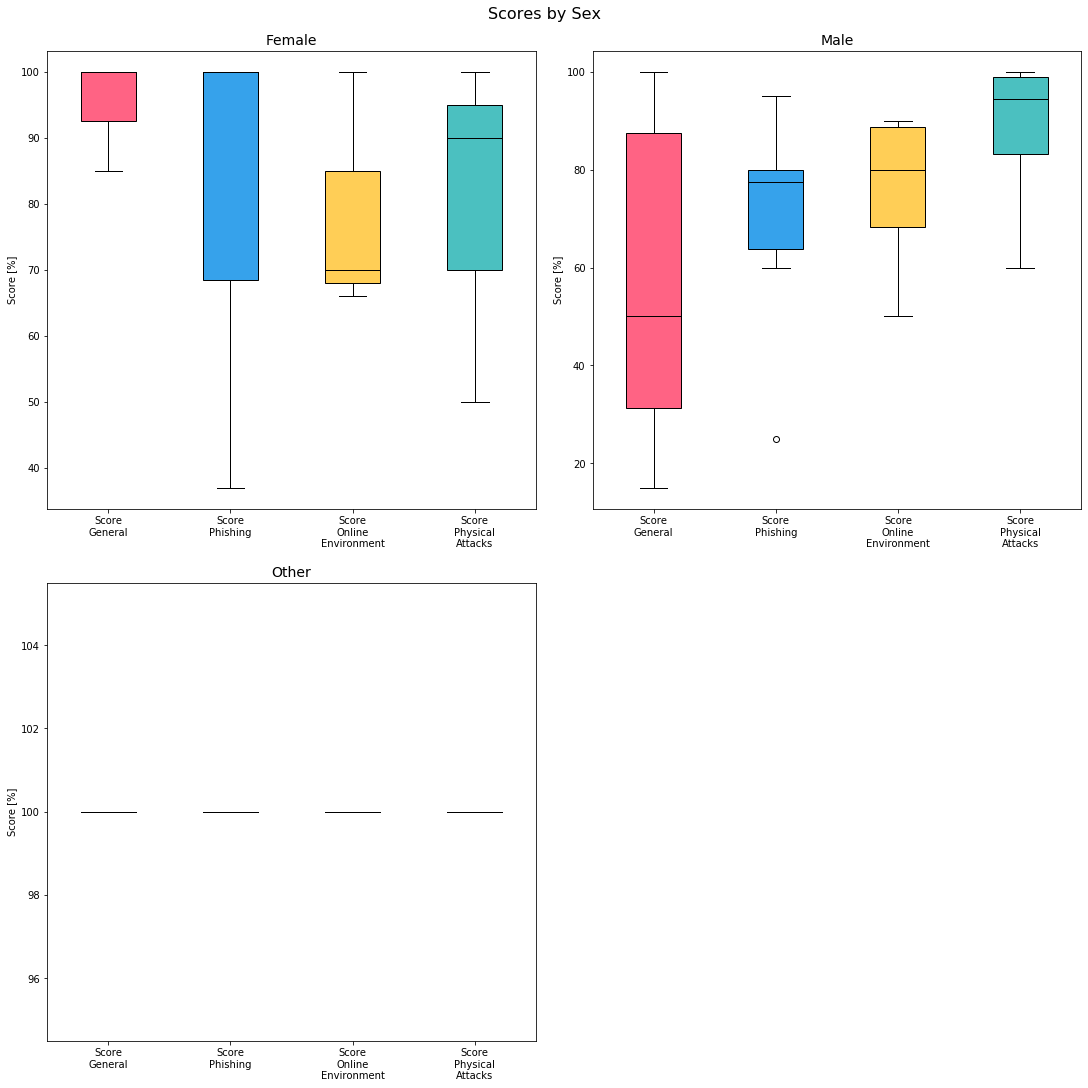

In [19]:
fig = plt.figure(constrained_layout=True, figsize=[15,15])


gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])

axs=[ax1,ax2,ax3]

for (ax,sex) in zip(axs,sexes):
    cursor.execute('''
    SELECT Score.general, Score.phishing, Score.online_environment, Score.physical_attacks 
    FROM Score
    INNER JOIN Visitor ON Score.visitor_ID = Visitor.visitor_ID
    WHERE sex = %s''', (sex,))

    general, phishing, online_environment, physical_attacks = [], [], [], []

    for i in cursor:
        general.append(i[0])
        phishing.append(i[1])
        online_environment.append(i[2])
        physical_attacks.append(i[3])

    score = [general, phishing, online_environment, physical_attacks]
    
    bp = ax.boxplot(score, vert=True, patch_artist=True, labels=labels)
    for patch, color in zip(bp['boxes'], c):
        patch.set_facecolor(color)
    for median in bp['medians']: 
        median.set(color ='black')
        
    ax.set_title(sex, fontsize=14)
    ax.set_ylabel('Score [%]')
        
fig.suptitle('Scores by Sex', fontsize=16)
plt.show()

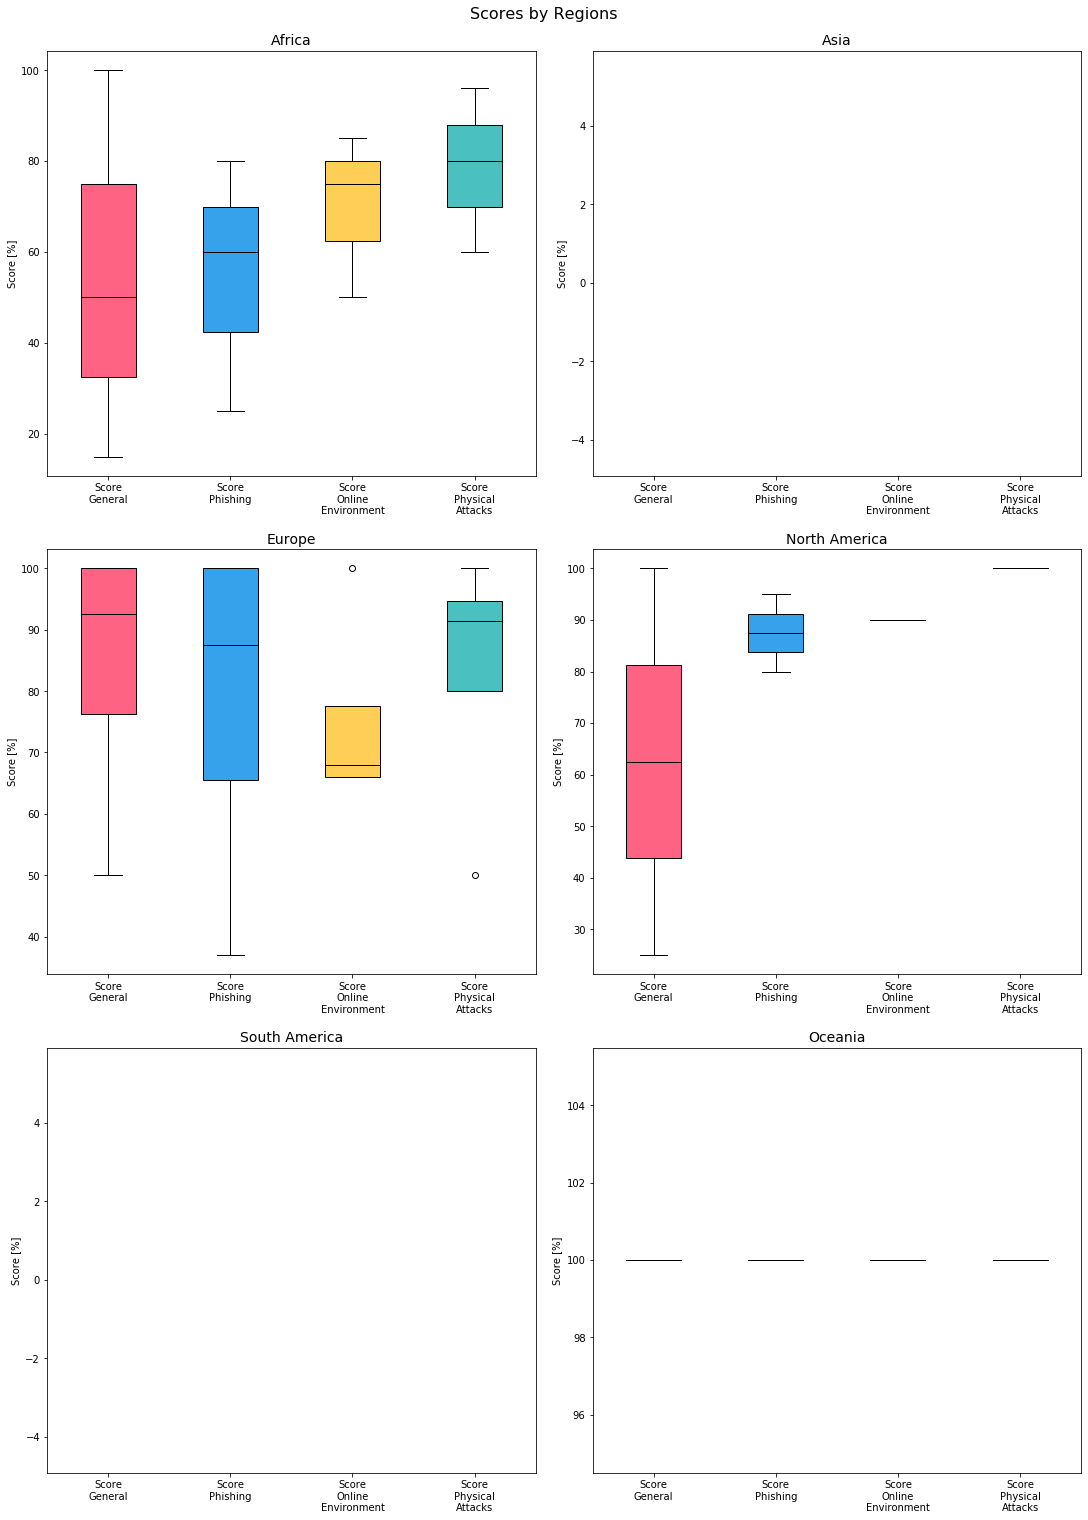

In [20]:
fig = plt.figure(constrained_layout=True, figsize=[15,21])


gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

axs=[ax1,ax2,ax3,ax4,ax5,ax6]

for (ax,region) in zip(axs,regions):
    cursor.execute('''
    SELECT Score.general, Score.phishing, Score.online_environment, Score.physical_attacks 
    FROM Score
    INNER JOIN Visitor ON Score.visitor_ID = Visitor.visitor_ID
    WHERE region = %s''', (region,))

    general, phishing, online_environment, physical_attacks = [], [], [], []

    for i in cursor:
        general.append(i[0])
        phishing.append(i[1])
        online_environment.append(i[2])
        physical_attacks.append(i[3])

    score = [general, phishing, online_environment, physical_attacks]
    
    labels = ['Score\nGeneral', 'Score\nPhishing', 'Score\nOnline\nEnvironment', 'Score\nPhysical\nAttacks']
    
    bp = ax.boxplot(score, vert=True, patch_artist=True, labels=labels)
    for patch, color in zip(bp['boxes'], c):
        patch.set_facecolor(color)
    for median in bp['medians']: 
        median.set(color ='black')
        
    ax.set_title(region, fontsize=14)
    ax.set_ylabel('Score [%]')
        
fig.suptitle('Scores by Regions', fontsize=16)
plt.show()

In [21]:
cursor.close()
connection.close()